In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



## Import dataset

In [32]:
data = np.genfromtxt('/kaggle/input/assignement-data/data.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

### Split the data into training and testing sets

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize the features

In [34]:

mean_X = np.mean(X_train, axis=0)
std_X = np.std(X_train, axis=0)
X_train = (X_train - mean_X) / std_X
X_test = (X_test - mean_X) / std_X

# Add intercept term to features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

### Initialize parameters for gradient descent

In [35]:
theta = np.zeros(X_train.shape[1])
alpha = 0.01
iterations = 1000

### Declare the sigmoid function

In [36]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Function to compute the cost function

In [37]:
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -(1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

### Function to perform gradient descent

In [38]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1/m) * np.dot(X.T, (h - y))
        theta -= alpha * gradient
        cost_history[i] = cost_function(X, y, theta)

    return theta, cost_history

## Run gradient descent plot cost history

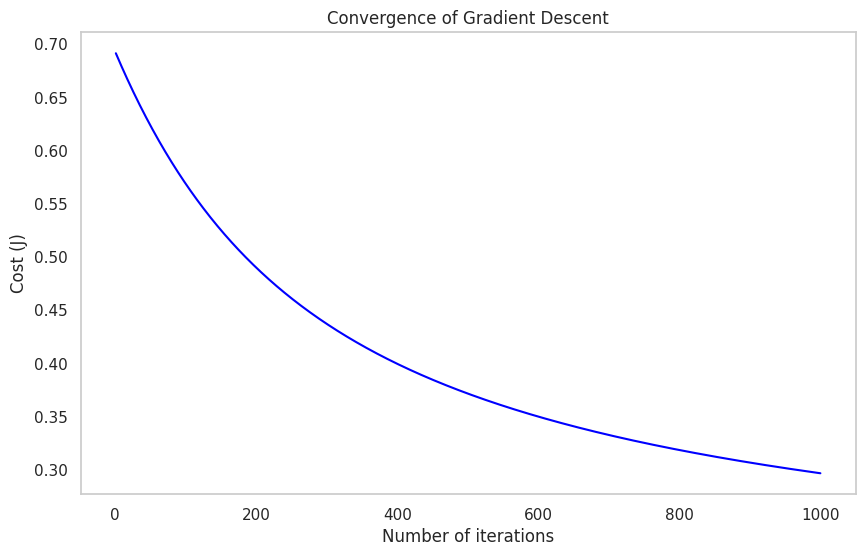

In [39]:
theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')
plt.show()


### Function to predict the class labels

In [40]:
def predict(X, theta):
    return sigmoid(np.dot(X, theta))


### Make predictions on the test set
### Convert probabilities to binary predictions

In [41]:
y_pred = predict(X_test, theta)
y_pred_binary = (y_pred >= 0.5).astype(int)

### Evaluate the model

In [42]:
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.80


### Plot the decision boundary and contour plot

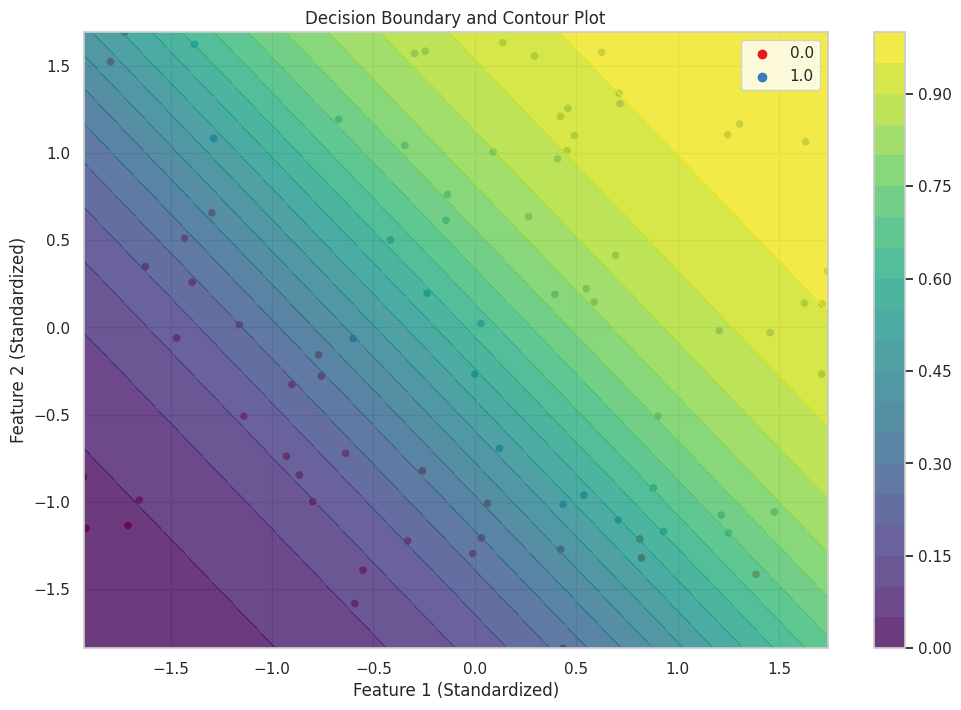

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.scatterplot(x=X_train[:, 1], y=X_train[:, 2], hue=y_train, palette="Set1", marker="o")

x_min, x_max = X_train[:, 1].min(), X_train[:, 1].max()
y_min, y_max = X_train[:, 2].min(), X_train[:, 2].max()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = predict(np.c_[np.ones_like(xx.ravel()), xx.ravel(), yy.ravel()], theta)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=20, cmap='viridis', alpha=0.8)
plt.colorbar()

plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('Decision Boundary and Contour Plot')

plt.legend()
plt.show()

In [44]:
print("farhan Mahtab Mahi\nreg no. 2018831036")

farhan Mahtab Mahi
reg no. 2018831036
